Textual analysis of the code.


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df.size)#The number of instances
print(df.columns)#Number of features
df.shape

900
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df=df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.iloc[120:,:].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
print(df['Species'])
'''dict={
    "Iris-setosa":0
    "Iris-versicolor":1
    "Iris-virginica":2
}'''

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


'dict={\n    "Iris-setosa":0\n    "Iris-versicolor":1\n    "Iris-virginica":2\n}'

In [9]:
df['Species'].value_counts(normalize=True)*100

,proportion
Species,
0,33.333333
1,33.333333
2,33.333333


array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>],
       [<Axes: title={'center': 'Species'}>, <Axes: >]], dtype=object)

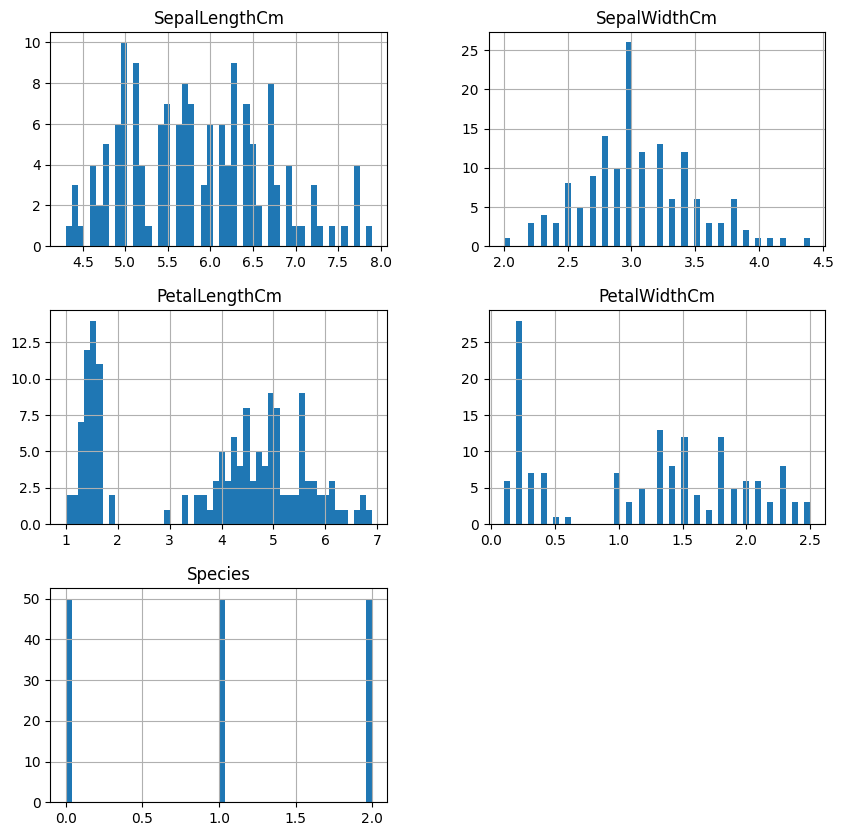

In [10]:
df.hist(bins=50,figsize=(10,10))

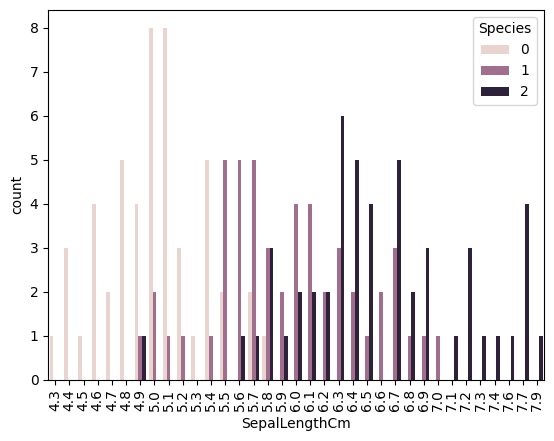

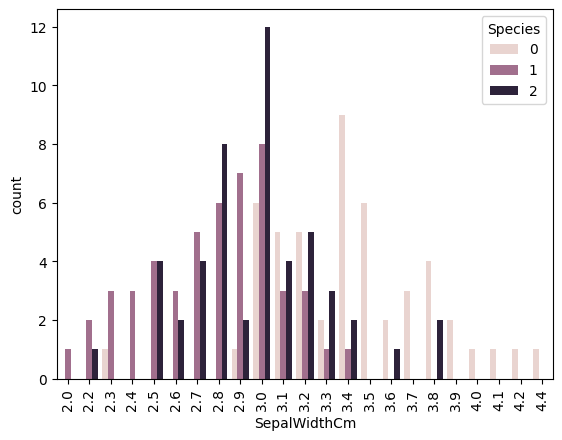

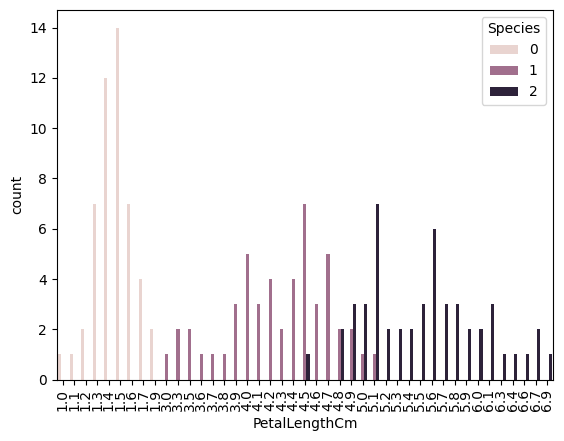

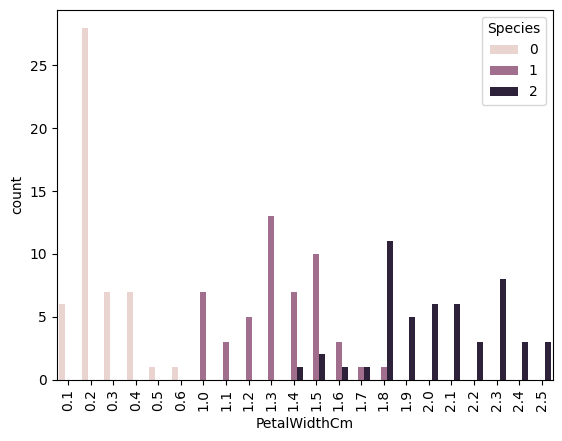

In [11]:
for i,predictor in enumerate(df.drop('Species',axis=1)):
  plt.figure(i)
  sns.countplot(data=df,x=predictor,hue='Species')
  plt.xticks(rotation=90)
  plt.show

<Axes: >

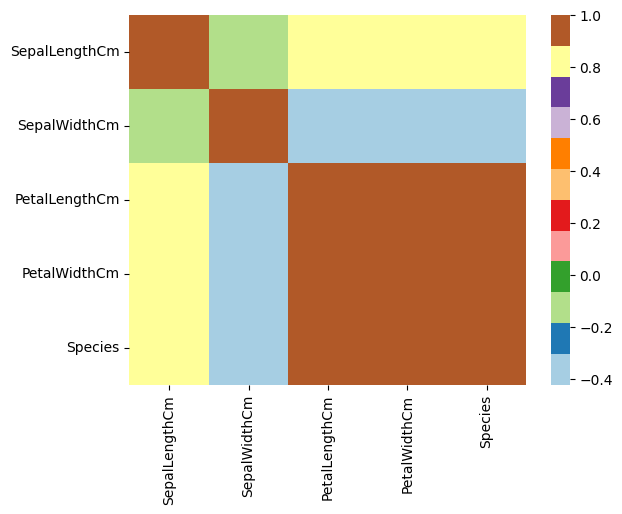

In [12]:
sns.heatmap(df.corr(),cmap='Paired')

In [13]:
df.corr()['Species']

,Species
SepalLengthCm,0.782561
SepalWidthCm,-0.419446
PetalLengthCm,0.949043
PetalWidthCm,0.956464
Species,1.000000


<Axes: >

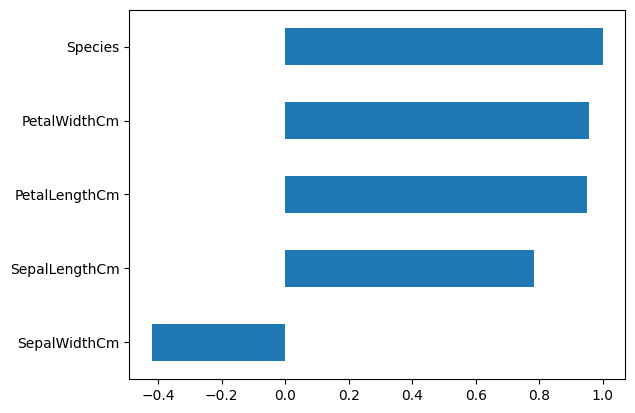

In [14]:
df.corr()['Species'].sort_values(ascending=True).plot(kind='barh')

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

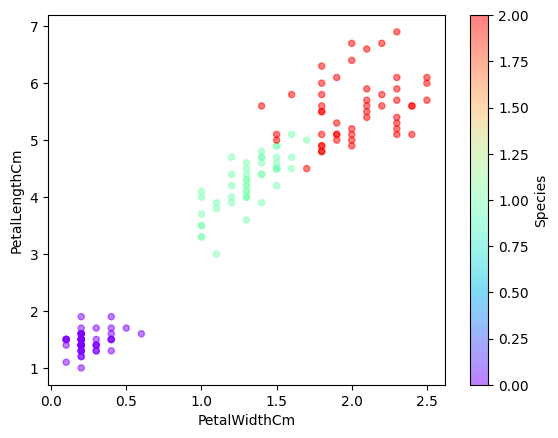

In [19]:
df.plot(kind='scatter',x='PetalWidthCm',y='PetalLengthCm',alpha=0.5,c='Species',cmap=plt.get_cmap('rainbow'))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

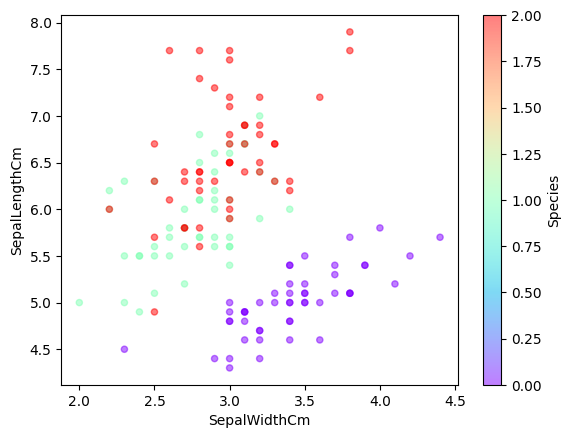

In [16]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm',alpha=0.5,c='Species',cmap=plt.get_cmap('rainbow'))

In [21]:
df.isnull().value_counts()

,,,,,count
SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
False,False,False,False,False,150


In [23]:
from sklearn.model_selection import train_test_split

In [36]:
x=df.iloc[:,[2,3]]
y=df['Species']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_test,y_test)
k_predicitons=knn.predict(x_test)
print(k_predicitons)

[2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


In [69]:
k_mse=mean_squared_error(y_test,k_predicitons)
k_rmse=np.sqrt(k_mse)
print(k_rmse)
print(accuracy_score(y_test,k_predicitons))

0.2581988897471611
0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

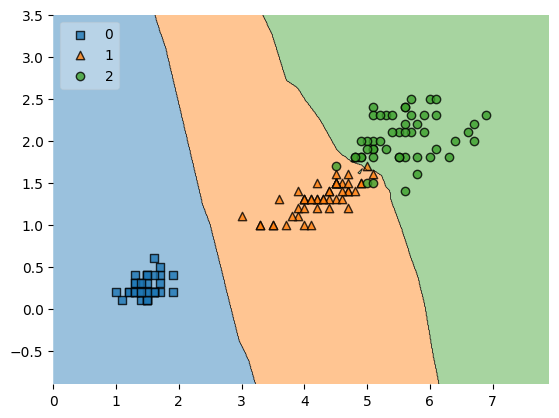

In [98]:
plot_decision_regions(x.values,y.values,clf=knn,legend=2)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predictions=dt.predict(x_test)
print(dt_predictions)

[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 1 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


In [92]:
dt_mse=mean_squared_error(y_test,dt_predictions)
dt_rmse=np.sqrt(dt_mse)
print(dt_rmse)
print(accuracy_score(y_test,dt_predictions))

0.2581988897471611
0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

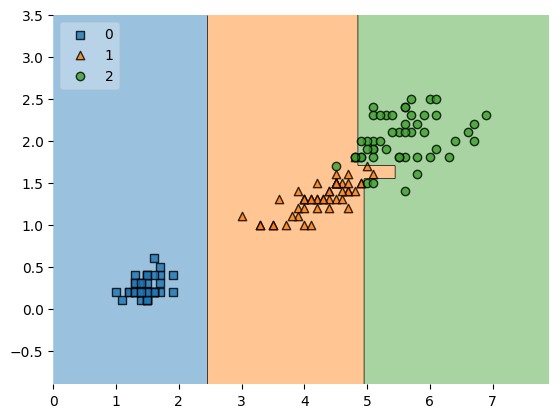

In [97]:
plot_decision_regions(x.values, y.values, clf=dt, legend=2)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)
print(rf_predictions)

[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 1 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: >

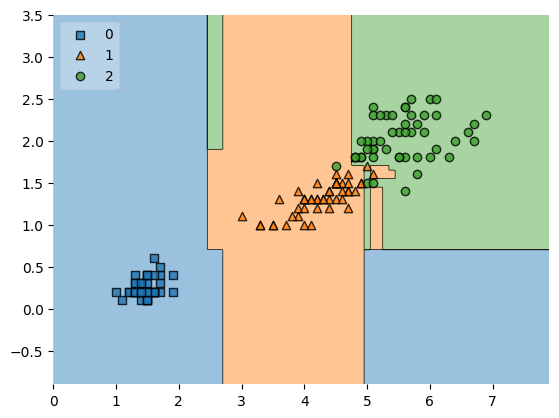

In [96]:
plot_decision_regions(x.values, y.values, clf=rf, legend=2)

In [81]:
rf_mse=mean_squared_error(y_test,rf_predictions)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)
print(accuracy_score(y_test,rf_predictions))

0.2581988897471611
0.9333333333333333


In [87]:
voting_clf=VotingClassifier(estimators=[('knn',knn),('dt',dt),('rf',rf)],voting='hard')

In [88]:
for clf in(knn,dt,rf,voting_clf):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

KNeighborsClassifier 0.9333333333333333
DecisionTreeClassifier 0.9333333333333333
RandomForestClassifier 0.9555555555555556
VotingClassifier 0.9555555555555556
